## 1. ETL

In [1]:
import pandas as pd
df = pd.read_csv('./Joules_of_Siam_Data - Dataset_1.csv')
df.head()

,Year,Population (Million persons),GDP Chain volume measures (billion baht),Core Consumer Price Index,Trade balance (Billions of USD),Total energry generation,Temperature,Rainfall,Exchange rate,Total_Comsumption
0,2022,66.09,10680.0,103.04,36.8,215824,26.30,2011.9,35.07,197256
1,2021,66.17,10409.9,100.52,32.4,209717,26.91,1759.3,31.98,190468
2,2020,66.19,10246.5,100.29,40.4,206034,27.43,1527.3,31.30,187046
3,2019,66.56,10923.3,100.00,26.7,212050,27.52,1343.4,31.05,192960
4,2018,66.41,10693.2,99.48,22.4,204428,26.92,1660.9,32.31,187832


In [2]:
df.shape

(21, 10)

## 3.Preprocessing

In [3]:
df.columns

Index(['Year', 'Population (Million persons)',
       'GDP Chain volume measures (billion baht)', 'Core Consumer Price Index',
       'Trade balance (Billions of USD)', 'Total energry generation',
       'Temperature', 'Rainfall', 'Exchange rate', 'Total_Comsumption'],
      dtype='object')

In [4]:
df.rename(columns={'Population (Million persons)':'Population', 'GDP Chain volume measures (billion baht)': 'GDP'}, inplace=True)

In [5]:
df.columns

Index(['Year', 'Population', 'GDP', 'Core Consumer Price Index',
       'Trade balance (Billions of USD)', 'Total energry generation',
       'Temperature', 'Rainfall', 'Exchange rate', 'Total_Comsumption'],
      dtype='object')

<AxesSubplot:>

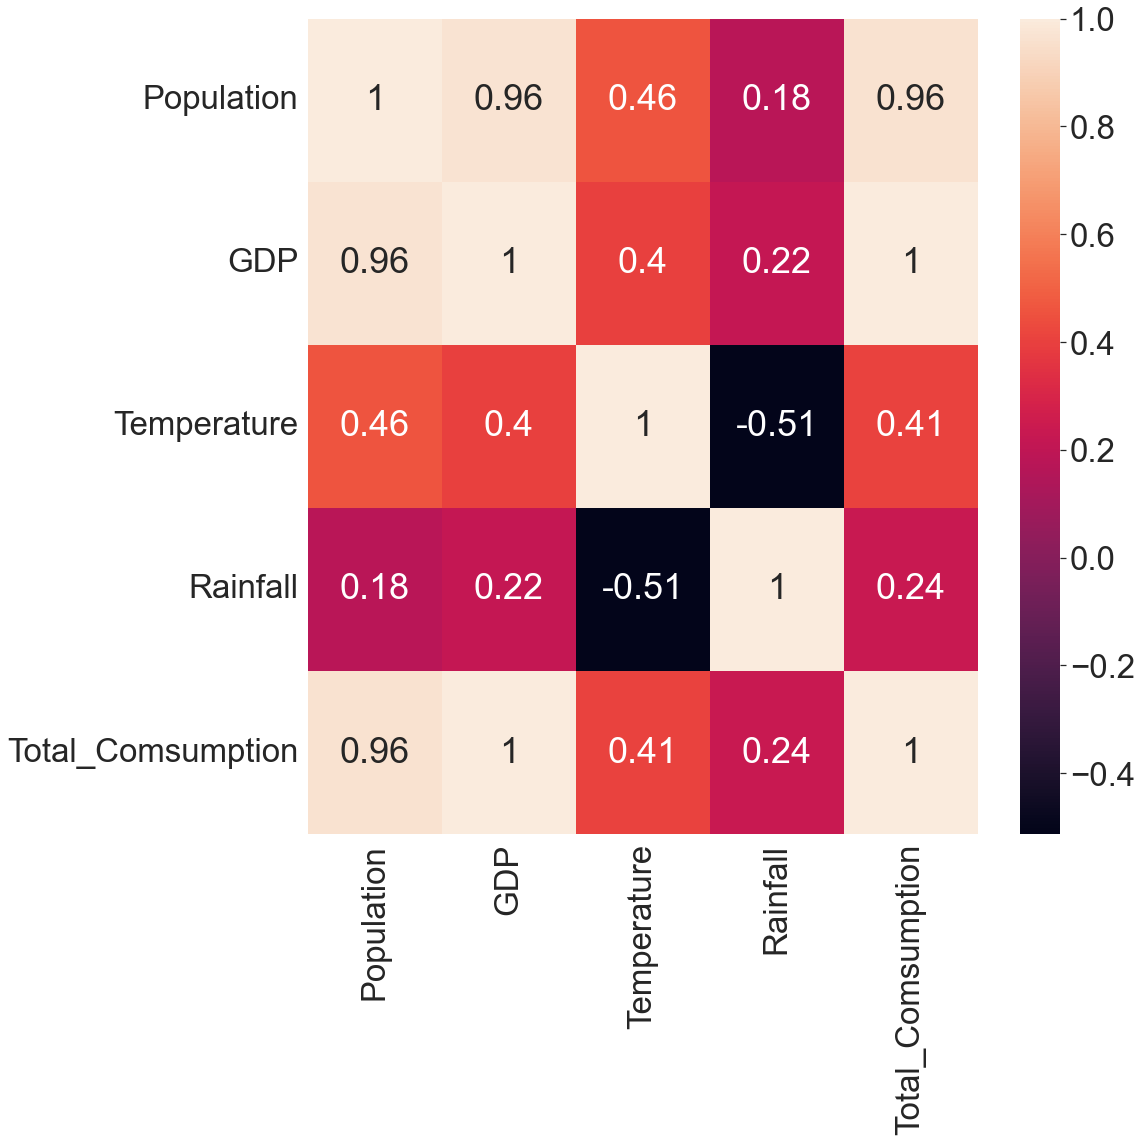

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(15, 15))
sns.set(font_scale=3)
sns.heatmap(df[['Population','GDP','Temperature', 'Rainfall','Total_Comsumption']].corr(),annot=True)

In [7]:
df.columns

Index(['Year', 'Population', 'GDP', 'Core Consumer Price Index',
       'Trade balance (Billions of USD)', 'Total energry generation',
       'Temperature', 'Rainfall', 'Exchange rate', 'Total_Comsumption'],
      dtype='object')

In [8]:
df.shape

(21, 10)

In [17]:
from sklearn.preprocessing import StandardScaler

#2. create the object
sc = StandardScaler()

#3. fit and transform
standardized_data = sc.fit_transform(df)

## 4. Modeling

In [22]:
from sklearn.model_selection import train_test_split
X = standardized_data[:,1:-1]
y = df.iloc[:,-1]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=999)

In [23]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((12, 8), (9, 8), (12,), (9,))

In [24]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train, y_train)
lr.score(X_test, y_test)

0.9991598704068052

In [25]:
yhat = lr.predict(X_test)

In [26]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
import math

MSE  = mean_squared_error(y_test, yhat)
RMSE = math.sqrt(MSE)
MAE  = mean_absolute_error(y_test, yhat)

MSE, RMSE, MAE

(490521.70055028144, 700.372544115117, 556.1842570963587)

### 4.1 Cross Validation

In [15]:
#1.import the algorithms
#Simple Regreesion
from sklearn.linear_model import LinearRegression

from sklearn.svm import SVR, SVC
from sklearn.naive_bayes import GaussianNB

#Ensemble
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import BaggingRegressor

lr  = LinearRegression(n_jobs = -1)
# rf  = RandomForestRegressor(n_jobs = -1)
# svr = SVR()
# gn = GaussianNB()
# ada = AdaBoostRegressor()
# br = BaggingRegressor()

models = [lr]
scores = []

#import the cross validation function 
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold

kf = KFold(n_splits = 10, shuffle=True)

#format: cross_val_score(model,xtrain,ytrain,cv=kfold(5),scoring='accuracy')
for model in models:
    scores.append(
        cross_val_score(model, X_train, y_train, cv=kf, 
                         scoring='neg_mean_squared_error').mean()
                  ) #try scoring='r2'

print(scores)

[-12518318.196323628]


### 4.2 Grid Search

In [16]:
#1. import the library
from sklearn.model_selection import GridSearchCV

param_grid = {
    'max_depth' : [5, 10],
    'n_estimators' : [5, 6, 7, 8, 9, 10],
    'max_features' : ['auto', 'log2'],
}

#3. define the model you want to search with
estimator = #which model the best

#4. define the gridsearch object with the search space
grid = GridSearchCV(estimator  = estimator,
                    param_grid = param_grid,
                    cv = 5,  #by default, it uses kfold anyway; 5 here means 5 fold
                    n_jobs  = -1,
                    refit   = True, #refits means, after 24 loops, it will fit the best version again!, so grid = best model
                    scoring = 'neg_mean_squared_error',
                    return_train_score=True)

#5. run the search
grid.fit(X_train, y_train)  #why training set???

SyntaxError: invalid syntax (3690866301.py, line 11)

In [ ]:
#best parameters
print(f"Best params: {grid.best_params_}")

#best mse (score)
print(f"Best mse: {grid.best_score_}")

#you can retrieve the best model (basically the model trained the best_params_)
print(f"Best estimator: {grid.best_estimator_}")  

## 5. Testing/Inference

In [ ]:
yhat = grid.predict(X_test)

## 5.1 Evaluation